## Computational Physics Lab 
### Homework 1.3
Yuan-Yen Peng   
Dept of Physics, NTHU, Taiwan   
October 17, 2022   

Angry Bird

In [274]:
import numpy as np
import scipy as sp
import scipy.constants as const
import matplotlib.pyplot as plt

In [275]:
dt = 0.01
g = const.g
mass = 5 # kg
R = 0.3 # bird radius [meter]
R_T = 0.5 # target radius [meter]
# bird's position
PosX = 0
PosY = 0
# bird's velocity
VelX = 5
VelY = 10
# The size of the playground
D_x = 100
D_y = 0
# Target position [meter, meter]
T = [7.5, 2]
# collide parameter (+ 0.05 --> tolerance)
PosSec = R + R_T + 0.05 
# convert point to m
s_bird = np.square(100 * R) # the point area (cm^2)
s_pig = np.square(100 * R_T) # the point area (cm^2)

Normal condition

In [276]:
def tr(PosX, PosY, VelX, VelY):
        x, y, vx, vy = PosX, PosY, VelX, VelY # temp
        X = np.array([x])
        Y = np.array([y])
        VX = np.array([vx])
        VY = np.array([vy])
        while (x <= D_x and y >= D_y):
                vy += -g * dt # temp
                VY = np.append(VY, vy)
                vx = vx # temp
                VX = np.append(VX, vx)
                x += vx * dt # temp
                X = np.append(X, x)
                y += vy * dt # temp
                Y = np.append(Y, y)
                if (np.sqrt(np.square(T[0] - x) + np.square(T[1] - y)) <= PosSec):
                        print('Booom!')
                        break
                
        return [X, Y, x, y]


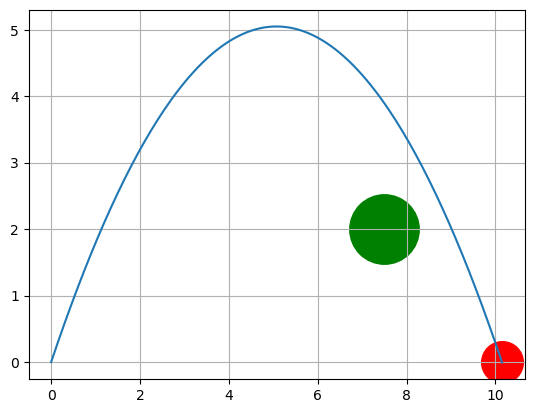

In [277]:
# %timeit tr(PosX, PosY, VelX, VelY)

plt.scatter(T[0], T[1], s_pig, c = 'g')
plt.scatter(tr(PosX, PosY, VelX, VelY)[2], tr(PosX, PosY, VelX, VelY)[3], s_bird, c = 'r')
plt.grid()
plt.plot(tr(PosX, PosY, VelX, VelY)[0], 
         tr(PosX, PosY, VelX, VelY)[1])

Add the drag force, air and water respectively.

In [278]:
def tr(PosX, PosY, VelX, VelY, eta):
        K = 6 * np.pi * R
        x, y, vx, vy = PosX, PosY, VelX, VelY # temp
        ax = -K * eta * vx # temp
        ay = -K * eta * vy # temp
        X = np.array([x])
        Y = np.array([y])
        VX = np.array([vx])
        VY = np.array([vy])
        AX = np.array([ax])
        AY = np.array([ay])
        while (x <= D_x and y >= D_y):
                vy += (-g + ay) * dt # temp
                VY = np.append(VY, vy)
                vx += ax * dt # temp
                VX = np.append(VX, vx)
                ax = -K * eta * vx # temp
                AX = np.append(AX, ax)
                ay = -K * eta * vy # temp
                AY = np.append(AY, ay)
                x += vx * dt # temp
                X = np.append(X, x)
                y += vy * dt # temp
                Y = np.append(Y, y)
                
                if (np.sqrt(np.square(T[0] - x) + np.square(T[1] - y)) <= PosSec):
                        print('Booom!')
                        break
                
        return [X, Y, x, y]

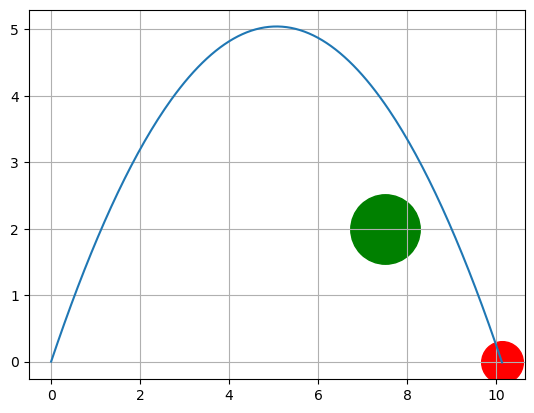

In [279]:
# in air 

eta_air = 2E-4
tr_air = tr(PosX, PosY, VelX, VelY, eta_air)
plt.scatter(T[0], T[1], s_pig, c = 'g')
plt.scatter(tr_air[2], tr_air[3], s_bird, c = 'r')
plt.grid()
plt.plot(tr_air[0], tr_air[1])

Booom!


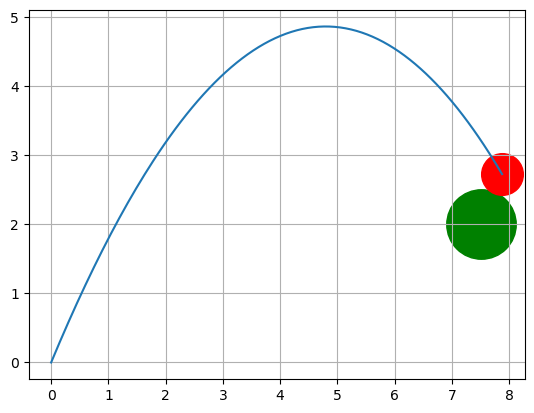

In [280]:
# in water

eta_water = 1E-2
tr_water = tr(PosX, PosY, VelX, VelY, eta_water)
plt.scatter(T[0], T[1], s_pig, c = 'g')
plt.scatter(tr_water[2], tr_water[3], s_bird, c = 'r')
plt.grid()
plt.plot(tr_water[0], tr_water[1])